**VGG**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Paths to dataset directories
path_to_train_data = 'drive/MyDrive/tuberculosis/Training'
path_to_validation_data = 'drive/MyDrive/tuberculosis/Validasi'
path_to_test_data = 'drive/MyDrive/tuberculosis/Testing'


In [ ]:
# Data preprocessing (Resizing dan Augmentasi)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    path_to_train_data,
    target_size=(224, 224),
    batch_size=100,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    path_to_validation_data,
    target_size=(224, 224),
    batch_size=100,
    class_mode='binary'
)


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
# Load VGG16 pre-trained model + additional layers
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg16.trainable = False  # Freeze base model

model_vgg16 = models.Sequential([
    base_model_vgg16,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: TB vs Non-TB
])

model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Training the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 417s 10s/step - accuracy: 0.7869 - loss: 1.8179 - val_accuracy: 0.9400 - val_loss: 0.1635
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9420 - loss: 0.1548 - val_accuracy: 0.9450 - val_loss: 0.1416
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9541 - loss: 0.1202 - val_accuracy: 0.9700 - val_loss: 0.0939
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9591 - loss: 0.1017 - val_accuracy: 0.9650 - val_loss: 0.1002
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9723 - loss: 0.0879 - val_accuracy: 0.9850 - val_loss: 0.0713
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9701 - loss: 0.0909 - val_accuracy: 0.9800 - val_loss: 0.0787


In [ ]:
# Evaluate on test data
test_generator = test_datagen.flow_from_directory(
    path_to_test_data,
    target_size=(224, 224),
    batch_size=100,
    class_mode='binary',
    shuffle=False
)


Found 600 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9971 - loss: 0.0120
Test Loss: 0.02739868126809597
Test Accuracy: 0.9900000095367432
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       500
           1       1.00      0.94      0.97       100

    accuracy                           0.99       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.99      0.99      0.99       600



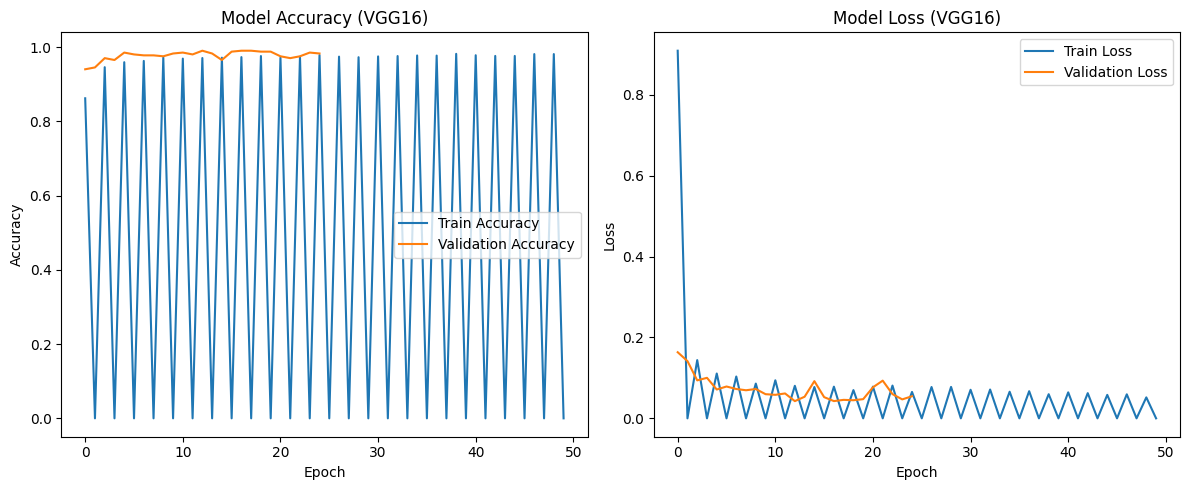

In [ ]:
# Evaluate model on test data
loss, accuracy = model_vgg16.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get the true labels and predicted labels for the test data
y_true = test_generator.classes
y_pred = model_vgg16.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Convert predictions to binary
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_true, y_pred_binary))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

**Full Code**


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Paths to dataset directories
path_to_train_data = 'drive/MyDrive/tuberculosis/Training'
path_to_validation_data = 'drive/MyDrive/tuberculosis/Validasi'
path_to_test_data = 'drive/MyDrive/tuberculosis/Testing'

# Data preprocessing (Resizing dan Augmentasi)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    path_to_train_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    path_to_validation_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load VGG16 pre-trained model + additional layers
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg16.trainable = False  # Freeze base model

model_vgg16 = models.Sequential([
    base_model_vgg16,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: TB vs Non-TB
])

model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate on test data
test_generator = test_datagen.flow_from_directory(
    path_to_test_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluate model on test data
loss, accuracy = model_vgg16.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get the true labels and predicted labels for the test data
y_true = test_generator.classes
y_pred = model_vgg16.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Convert predictions to binary
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report
print(classification_report(y_true, y_pred_binary))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/tuberculosis/Training'

**Resnet**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Paths to dataset directories
path_to_train_data = 'drive/MyDrive/tuberculosis/Training'
path_to_validation_data = 'drive/MyDrive/tuberculosis/Validasi'
path_to_test_data = 'drive/MyDrive/tuberculosis/Testing'

In [ ]:
# Data preprocessing (Resizing dan Augmentasi)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    path_to_train_data,
    target_size=(224, 224),
    batch_size=100,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    path_to_validation_data,
    target_size=(224, 224),
    batch_size=100,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    path_to_test_data,
    target_size=(224, 224),
    batch_size=100,
    class_mode='binary',
    shuffle=False
)


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
# Load ResNet50 pre-trained model + additional layers
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet50.trainable = False  # Freeze base model

model_resnet50 = models.Sequential([
    base_model_resnet50,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: TB vs Non-TB
])

model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Training the model
history_resnet50 = model_resnet50.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7456 - loss: 3.9042 - val_accuracy: 0.7625 - val_loss: 0.5836
Epoch 2/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8221 - loss: 0.5022 - val_accuracy: 0.7500 - val_loss: 0.5501
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8434 - loss: 0.4516 - val_accuracy: 0.7500 - val_loss: 0.5916
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8551 - loss: 0.4137 - val_accuracy: 0.7500 - val_loss: 0.5382
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.8392 - loss: 0.4482 - val_accuracy: 0.7500 - val_loss: 0.5534
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9524 - loss: 0.2481
Test Loss: 0.4130352735519409
Test Accuracy: 0.8333333134651184
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91       500
           1       0.00      0.00      0.00       100

    accuracy                           0.83       600
   macro avg       0.42      0.50      0.45       600
weighted avg       0.69      0.83      0.76       600



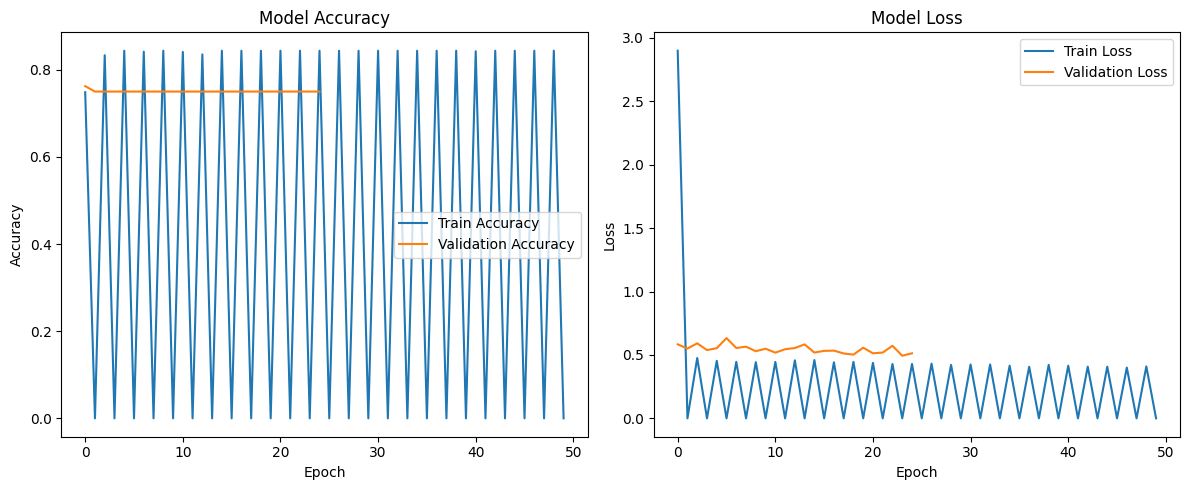

In [ ]:
# Evaluate on test data using model.evaluate()
loss, accuracy = model_resnet50.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Predict the labels for the test data
y_true = test_generator.classes
y_pred_resnet = model_resnet50.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Convert predictions to binary
y_pred_resnet_binary = (y_pred_resnet > 0.5).astype(int)

# Print classification report
print(classification_report(y_true, y_pred_resnet_binary))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np


# Paths to dataset directories
path_to_train_data = 'drive/MyDrive/tuberculosis/Training'
path_to_validation_data = 'drive/MyDrive/tuberculosis/Validasi'
path_to_test_data = 'drive/MyDrive/tuberculosis/Testing'

# Data preprocessing (Resizing dan Augmentasi)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    path_to_train_data,
    target_size=(224, 224),
    batch_size=100,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    path_to_validation_data,
    target_size=(224, 224),
    batch_size=100,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    path_to_test_data,
    target_size=(224, 224),
    batch_size=100,
    class_mode='binary',
    shuffle=False
)

# Load ResNet50 pre-trained model + additional layers
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet50.trainable = False  # Freeze base model

model_resnet50 = models.Sequential([
    base_model_resnet50,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: TB vs Non-TB
])

model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_resnet50 = model_resnet50.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate on test data using model.evaluate()
loss, accuracy = model_resnet50.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Predict the labels for the test data
y_true = test_generator.classes
y_pred_resnet = model_resnet50.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Convert predictions to binary
y_pred_resnet_binary = (y_pred_resnet > 0.5).astype(int)

# Print classification report
print(classification_report(y_true, y_pred_resnet_binary))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3200 images belonging to 2 classes.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/klasifikasi_tuberculosis/Validasi'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
